17.10 Optimal investment to fund an expense stream

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
# Input data
n = 6
T = 12
rp = 0.05 / 12 # r+
rn = 0.09 / 12 # r-

E = np.array([1, 1, 8, 5, 1, 2, 2, 8, 6, 0, 8, 1])                   # expense
C = np.array([0.0060, 0.0050, 0.0030, 0.0070, 0.0050, 0.0040])     # coupon
P = np.array([0.9870, 0.9805, 0.9761, 0.9946, 0.9783, 0.9680])     # bond price
M = np.array([3, 4, 6, 6, 9, 10])                                   # time to maturity

A = np.zeros((T, n))  # A: (time x coupon_type) A=[a_{t,i}]
for i in range(n):
    A[0:M[i] - 1, i] = C[i]
    A[M[i], i] = C[i] + 1

In [49]:
x = cp.Variable(n, nonneg=True)
B0 = cp.Variable(nonneg=True)
balance = cp.Variable(T+1)
objective = cp.Minimize(x.T @ P + B0)
constraints = [
    balance[0] == B0 * (1 + rp),
    balance[-1] >= 0
    ]
for t in range(T):
    constraints += [
        balance[t+1] <= 
    cp.minimum((1 + rp) * (balance[t] - E[t] + A[t].T @ x), 
                (1 + rn) * (balance[t] - E[t] + A[t].T @ x))
                ] # note that r- >= r+

prob = cp.Problem(objective, constraints)
result = prob.solve()
x_opt = x.value
print(np.round(x_opt, decimals=4))
print(B0.value)
print(x_opt.T @ P + B0.value)

[ 0.     19.0533  0.      0.     13.9517  8.96  ]
5.840993944653593e-07
41.00406146982355


In [18]:
# if no bonds were purchased
B = 0
balance_nobond = []
for t in range(T-1, -1, -1):
    B += E[t]
    B = B / (1 + rp)
    balance_nobond.append(B)
balance_nobond.append(balance_nobond[-1] / (1 + rp)) # append B0
balance_nobond.reverse()
print(balance_nobond[0])

41.61683984635444


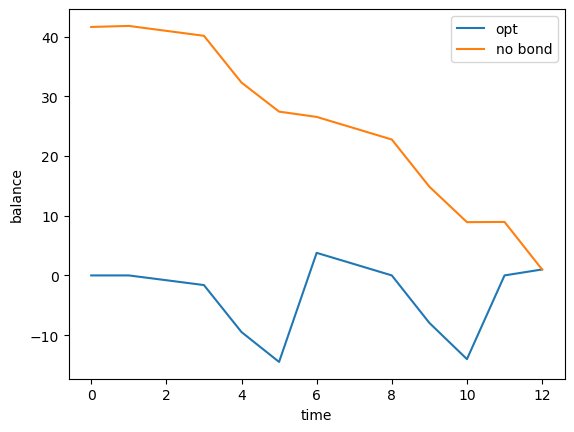

In [46]:
plt.plot([B0.value] + list(balance.value[:-1]), label='opt')
plt.plot(balance_nobond, label='no bond')
plt.xlabel('time')
plt.ylabel('balance')
plt.legend()
plt.show()